# Task:

Derive similarity score between two sentences applying three different techniques. 
- Reference Article: [A beginner’s guide to measuring sentence similarity](https://medium.com/@igniobydigitate/a-beginners-guide-to-measuring-sentence-similarity-f3c78b9da0bc)

## Sentence Embedding

Sentence embedding represents a sentence as a vector of numbers. This numerical representation of a sentence is called sentence embedding. In a word embedding corresponds to a particular feature or aspect of the word. A sentence embedding is based on a similar concept where the dimensions collectively capture different aspects of the words used in the sentence, the grammatical structure of the sentence, and maybe some more underlying information.

There are various ways in which a sentence embedding can be created. Once we have each sentence represented as a vector of numbers, then the problem of finding sentence similarity translates to the problem of finding similarity between these numeric vectors.

In this notebook I will discuss a couple of statistical techniques to create numeric representations of sentences and briefly explore an idea of how one can utilize word embeddings for the same task. I will also discuss how similarity between sentence embeddings can be computed.

### Sample sentences

We take sentences form two unrelated movies to work with. This is done with the goal to demonstrate how sentences turn out to be either similar or dissimilar across these movies. I expect sentences from spiderman to show higher similarity with other senteces from the same movie and a lower similarity score from the sentences from the movie Godfather.

In [47]:
import numpy as np
import pandas as pd

In [70]:
# Sample sentences from Spider-Man
spiderman_sentences = [
    "With great power comes great responsibility.",
    "I missed the part where that's my problem.",
    "You're not Superman, you know.",
    "Remember, with great power comes great responsibility.",
    "I'm just Peter Parker. I'm Spider-Man no more.",
    "Whatever life holds in store for me, I will never forget these words.",
    "The truth is, I am Spider-Man.",
    "This is my gift, my curse. Who am I? I'm Spider-Man.",
    "Sometimes, to do what's right, we have to be steady and give up the things we want the most.",
    "I want to tell you the truth... here it is: I'm Spider-Man."
]

# Sample sentences from The Godfather
godfather_sentences = [
    "I'm gonna make him an offer he can't refuse.",
    "Revenge is a dish best served cold.",
    "A man who doesn't spend time with his family can never be a real man.",
    "Leave the gun. Take the cannoli.",
    "The lawyer with the briefcase can steal more money than the man with the gun.",
    "It's not personal, Sonny. It's strictly business.",
    "Women and children can be careless, but not men.",
    "Power wears out those who do not have it.",
    "Friendship is everything. Friendship is more than talent. It is more than the government. It is almost the equal of family.",
    "Great men are not born great, they grow great."
]

all_sentences = spiderman_sentences + godfather_sentences

### Bag of words

The basic idea is to find out which words are present in a sentence and assess the importance of a word based on how many times it occurs in a sentence.

#### Creating a dictionary and removing stop words

Words such as is, are, a, an, the etc do not add much value in terms of providing context to a sentence. These are called stop words. So before we go ahead and count the frequency of words, we want to remove these stop words from the sentences.

In [1]:
# Define a list of stop words
stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
    'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
}

#### Removing punctuations
Before we go ahead and remove stop words, we first want to remove punctuations from the words so that they also get flagged as stop words. And even if not we don't want to consider men and men. as different words. So we remove punctuations.

Explanation of code below:

- str.maketrans('', '', string.punctuation) creates a translation table that maps each character in string.punctuation to None.
- str.maketrans is a static method that returns a translation table usable for str.translate.
- The first two arguments are empty strings ('') because we are not replacing any characters, only removing.
- The third argument is string.punctuation, which contains all punctuation characters.
- word.translate(...) uses the translation table to remove all punctuation characters from the word.

In [43]:
import string
def remove_punctuation(word):
    return word.translate(str.maketrans('', '', string.punctuation))

In [44]:
# Sample sentence
sentence = "This is an example sentence showing the removal of stop words."

def remove_stop_words(sentence):
    
    # Tokenize the sentence
    words = sentence.lower().split()
    
    # Remove stop words
    filtered_words = [remove_punctuation(word) for word in words if word not in stop_words]
    
    # Join the words back into a sentence
    filtered_sentence = ' '.join(filtered_words)

    return filtered_sentence

print("Original sentence:", sentence)
print("Filtered sentence:", remove_stop_words(sentence))

Original sentence: This is an example sentence showing the removal of stop words.
Filtered sentence: example sentence showing removal stop words


In [45]:
# Removing stopwords from all sentences in our database

spiderman_stop_removed = []
godfather_stop_removed = []

for sentence in spiderman_sentences:
    spiderman_stop_removed.append(remove_stop_words(sentence).split())

for sentence in godfather_sentences:
    godfather_stop_removed.append(remove_stop_words(sentence).split())

print("spiderman_original:")
print(spiderman_sentences[0])
print(spiderman_sentences[1])
print(spiderman_sentences[2])
print()
print("spiderman_stop_removed:")
print(spiderman_stop_removed[0])
print(spiderman_stop_removed[1])
print(spiderman_stop_removed[2])


spiderman_original:
With great power comes great responsibility.
I missed the part where that's my problem.
You're not Superman, you know.

spiderman_stop_removed:
['great', 'power', 'comes', 'great', 'responsibility']
['missed', 'part', 'thats', 'problem']
['youre', 'superman', 'know']


#### Creating a dictionary of words in all sentences

Now that we have removed the stop words, let's create a dictionary of all non stop words and create a dataset where for each sentence we have a row of frequency of each word

In [53]:
# Creating a set of all unique words

# Let's combine all arrays into one
all_sentences_stop_removed = spiderman_stop_removed+ godfather_stop_removed

# get unique words from all sentences and put it into a set
unique_words = set()
for sentence in all_sentences_stop_removed:
    for word in sentence:
        unique_words.add(word)

print(f"Total unique words : {len(unique_words)}")

Total unique words : 82


#### Creating the dataframe that shows the word count of each sentence

In [49]:
from collections import Counter

In [55]:
# Create a frequency matrix
frequency_matrix = []

for sentence in all_sentences_stop_removed:
    word_count = Counter(sentence)
    frequency_matrix.append([word_count.get(word, 0) for word in unique_words])

# Create a DataFrame
df = pd.DataFrame(frequency_matrix, columns=list(unique_words))
print(df)

    remember  equal  know  superman  man  lawyer  money  real  cannoli  im  \
0          0      0     0         0    0       0      0     0        0   0   
1          0      0     0         0    0       0      0     0        0   0   
2          0      0     1         1    0       0      0     0        0   0   
3          1      0     0         0    0       0      0     0        0   0   
4          0      0     0         0    0       0      0     0        0   2   
5          0      0     0         0    0       0      0     0        0   0   
6          0      0     0         0    0       0      0     0        0   0   
7          0      0     0         0    0       0      0     0        0   1   
8          0      0     0         0    0       0      0     0        0   0   
9          0      0     0         0    0       0      0     0        0   1   
10         0      0     0         0    0       0      0     0        0   1   
11         0      0     0         0    0       0      0     0   

#### Using cosine similarity to calculate how similar the sentences are

Consider that two n-dimensional arrays are plotted as two vectors in an n-dimensional space. Cosine similarity measures the angle between these two vectors and returns a value between -1 and 1. Mathematically, given two vectors A and B, cosine similarity is calculated as follows:

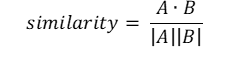

where,


- A.B = Dot product between two vectors. It is calculated by adding the product of corresponding vector values.


- |A|, |B| = Magnitude of a vector. It is the square root of the sum of squares of all the vector values.

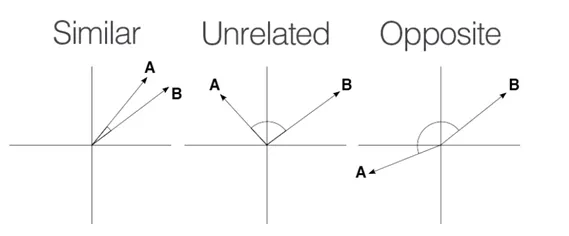

#### The cosine similarity function

In [56]:
def consine(vec1, vec2):
    # Compute the dot product
    dot_product = np.dot(vec1, vec2)
    
    # Compute the Euclidean norm (magnitude) of each vector
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    
    # Compute the cosine similarity
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0.0
    else:
        return dot_product / (norm_vec1 * norm_vec2)

In [76]:
# Testing this between two sentences within the spiderman movie
print(all_sentences)
print(len(all_sentences))

['With great power comes great responsibility.', "I missed the part where that's my problem.", "You're not Superman, you know.", 'Remember, with great power comes great responsibility.', "I'm just Peter Parker. I'm Spider-Man no more.", 'Whatever life holds in store for me, I will never forget these words.', 'The truth is, I am Spider-Man.', "This is my gift, my curse. Who am I? I'm Spider-Man.", "Sometimes, to do what's right, we have to be steady and give up the things we want the most.", "I want to tell you the truth... here it is: I'm Spider-Man.", "I'm gonna make him an offer he can't refuse.", 'Revenge is a dish best served cold.', "A man who doesn't spend time with his family can never be a real man.", 'Leave the gun. Take the cannoli.', 'The lawyer with the briefcase can steal more money than the man with the gun.', "It's not personal, Sonny. It's strictly business.", 'Women and children can be careless, but not men.', 'Power wears out those who do not have it.', 'Friendship is

In [72]:
# Let's try the first and the 4th statement
all_sentences[0]

'With great power comes great responsibility.'

In [71]:
all_sentences[3]

'Remember, with great power comes great responsibility.'

In [80]:
consine(df.loc[0], df.loc[3])

0.9354143466934852

In [79]:
# Let's pick a sentence that does not have power or responsibility in it
all_sentences[18]

'Friendship is everything. Friendship is more than talent. It is more than the government. It is almost the equal of family.'

In [82]:
consine(df.loc[0], df.loc[18])

0.0

This is not similar at at all!

Let's write a function that given two sentences does this process end to end

In [83]:
def findSimilarityCosine(sentence1, sentence2):
    # combining sentences to an array
    sentences = [sentence1, sentence2]
    stop_removed = []

    # removing stop words and punctuation from the words
    for sentence in sentences:
        stop_removed.append(remove_stop_words(sentence).split())

    # getting list of unique words
    unique_words = set()
    for sentence in stop_removed:
        for word in sentence:
            unique_words.add(word)

    # Create a frequency matrix
    frequency_matrix = []
    
    for sentence in stop_removed:
        word_count = Counter(sentence)
        frequency_matrix.append([word_count.get(word, 0) for word in unique_words])
    
    # Create a DataFrame
    df = pd.DataFrame(frequency_matrix, columns=list(unique_words))

    return consine(df.loc[0], df.loc[1])

In [84]:
findSimilarityCosine("Who let the dogs out!", "Who let the cats out!")

0.6666666666666667

In [86]:
findSimilarityCosine("Mamma mia , here we go again ", "My my! how can I resist you ?")

0.0

In [88]:
paragraph1 = "In the bustling city of Metropolis, the skyline is dominated by towering skyscrapers that reach for the heavens. The streets below are a hive of activity, with people from all walks of life hurrying to and fro. The air is filled with the sounds of honking cars, distant sirens, and the constant chatter of passersby. Amidst the urban chaos, pockets of tranquility can be found in the form of small parks and green spaces, offering a brief respite from the hustle and bustle. At night, the city transforms into a sea of lights, with neon signs and street lamps illuminating the dark, creating a vibrant and lively atmosphere that never seems to sleep."
paragraph2 = "In the tranquil town of Riverview, life moves at a leisurely pace. The town is known for its picturesque scenery, with rolling hills and a serene river that winds its way through the heart of the community. The streets are lined with charming houses, each with well-tended gardens bursting with colorful flowers. The sound of birds singing fills the air, and the occasional laughter of children playing can be heard in the distance. Riverview's town square is a hub of local activity, where residents gather for farmers' markets, craft fairs, and community events. As the sun sets, the town is bathed in a golden glow, and the sky is painted with hues of pink and orange, bringing a peaceful end to another day in this idyllic setting."

print(paragraph1)
print()
print(paragraph2)

In the bustling city of Metropolis, the skyline is dominated by towering skyscrapers that reach for the heavens. The streets below are a hive of activity, with people from all walks of life hurrying to and fro. The air is filled with the sounds of honking cars, distant sirens, and the constant chatter of passersby. Amidst the urban chaos, pockets of tranquility can be found in the form of small parks and green spaces, offering a brief respite from the hustle and bustle. At night, the city transforms into a sea of lights, with neon signs and street lamps illuminating the dark, creating a vibrant and lively atmosphere that never seems to sleep.

In the tranquil town of Riverview, life moves at a leisurely pace. The town is known for its picturesque scenery, with rolling hills and a serene river that winds its way through the heart of the community. The streets are lined with charming houses, each with well-tended gardens bursting with colorful flowers. The sound of birds singing fills th

In [89]:
findSimilarityCosine(paragraph1, paragraph2)

0.05466133744605251